In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import os
# import the path
path = os.path.abspath(os.path.join("..", "01_get_the_data", "spy_historical_data.csv"))

In [8]:
# Load the CSV
df = pd.read_csv(path)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Show the result
df.head()

,datetime,SPY
0,2021-08-31 16:30:00,451.56
1,2021-09-01 16:30:00,451.80
2,2021-09-02 16:30:00,453.19
3,2021-09-03 16:30:00,453.08
4,2021-09-07 16:30:00,451.46


In [9]:
# Calculate simple returns with pct_change()
simple_returns = df['SPY'].pct_change().fillna(0)

# Cumulative product of simple returns (correct for compounding)
cumprod_simple = (1 + simple_returns).cumprod() - 1

cumumax_spy = cumprod_simple.cummax()

drawdown_spy = (cumprod_simple - cumumax_spy)/(cumumax_spy + 1)

max_drawdown_spy = drawdown_spy.min()
print(f"Max Drawdown: {max_drawdown_spy:.2%}")

Max Drawdown: -25.36%


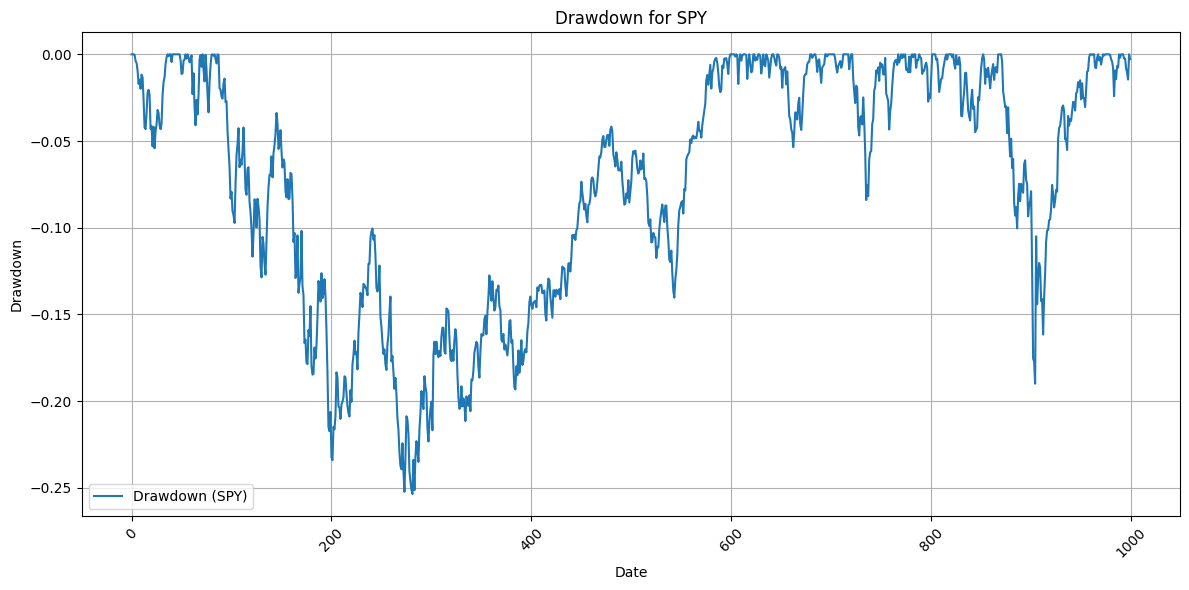

In [13]:
# plot drawdown_spy with datetime as index
plt.figure(figsize=(12, 6))
plt.plot(drawdown_spy.index, drawdown_spy, label='Drawdown (SPY)')
plt.title('Drawdown for SPY')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()